# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create parameters dictionary for each city
    params = {"q": city, 
              "appid": weather_api_key,
              "units": "imperial"}
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapa'a
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | tranovaho
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | labytnangi
Processing Record 8 of Set 1 | usoke
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | yuzhno-kurilsk
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | villa emilio carranza
Processing Record 15 of Set 1 | revda
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | mancio lima
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | anady

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[city_data_df.notnull().all(axis=1)]

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapa'a,22.0752,-159.3190,82.38,82.0,100.0,17.27,US,1.717447e+09
1,kodiak,57.7900,-152.4072,45.91,87.0,100.0,6.91,US,1.717448e+09
2,san patricio,28.0170,-97.5169,91.35,60.0,100.0,21.34,US,1.717448e+09
4,thompson,55.7435,-97.8558,59.16,55.0,75.0,8.05,CA,1.717448e+09
5,bredasdorp,-34.5322,20.0403,58.21,77.0,100.0,10.51,ZA,1.717448e+09


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,82.38,82.0,100.0,17.27,US,1.717447e+09
1,kodiak,57.7900,-152.4072,45.91,87.0,100.0,6.91,US,1.717448e+09
2,san patricio,28.0170,-97.5169,91.35,60.0,100.0,21.34,US,1.717448e+09
4,thompson,55.7435,-97.8558,59.16,55.0,75.0,8.05,CA,1.717448e+09
5,bredasdorp,-34.5322,20.0403,58.21,77.0,100.0,10.51,ZA,1.717448e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

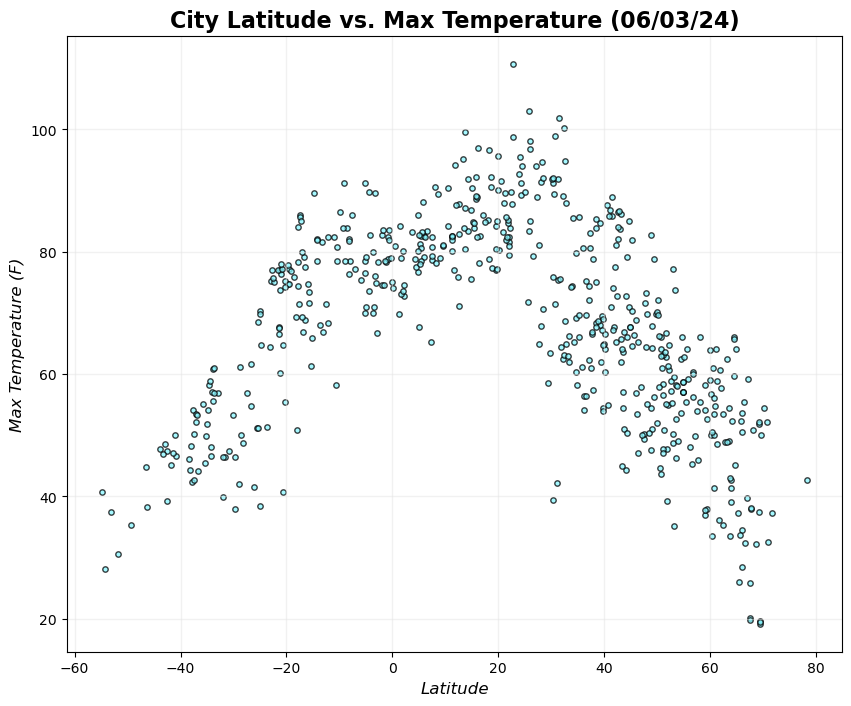

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], marker="o", s=15, alpha=0.75, color="#87F6FF", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"), fontsize=16, fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temperature (F)", fontsize=12, fontstyle="italic")
plt.grid(color="#E5E5E5", linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

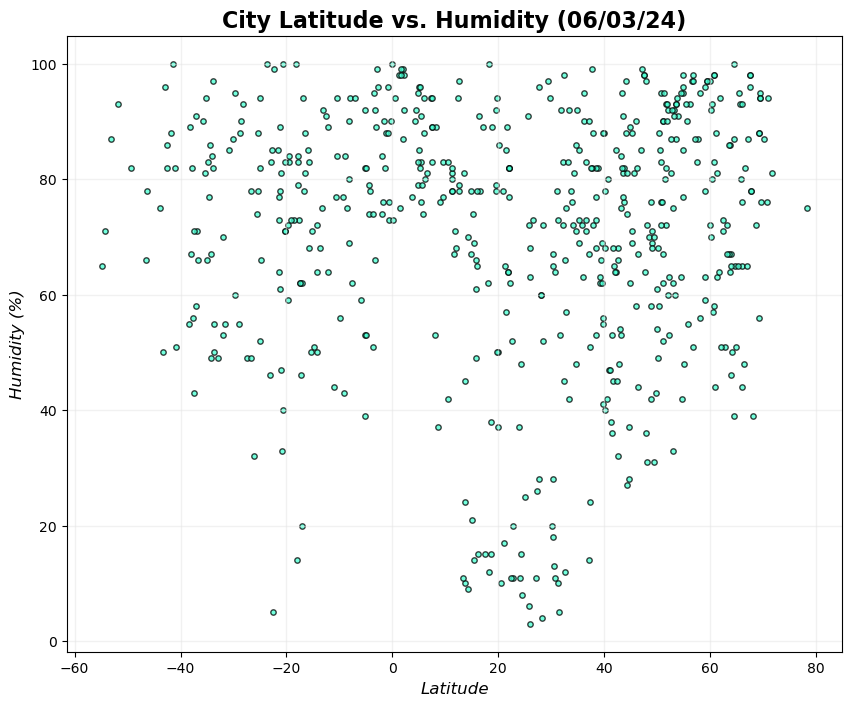

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df.Lat, city_data_df.Humidity, marker="o", s=15, alpha=0.75, color="#44FFD2", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"), fontsize=16, fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")
plt.grid(color="#E5E5E5", linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

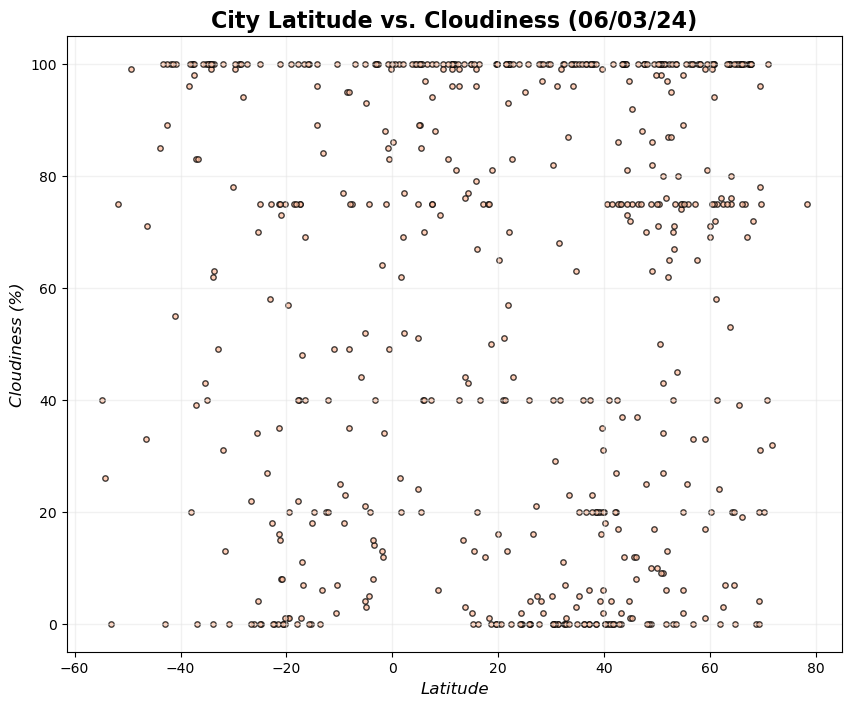

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, marker="o", s=15, alpha=0.75, color="#FFBFA0", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"), fontsize=16, fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")
plt.grid(color="#E5E5E5", linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

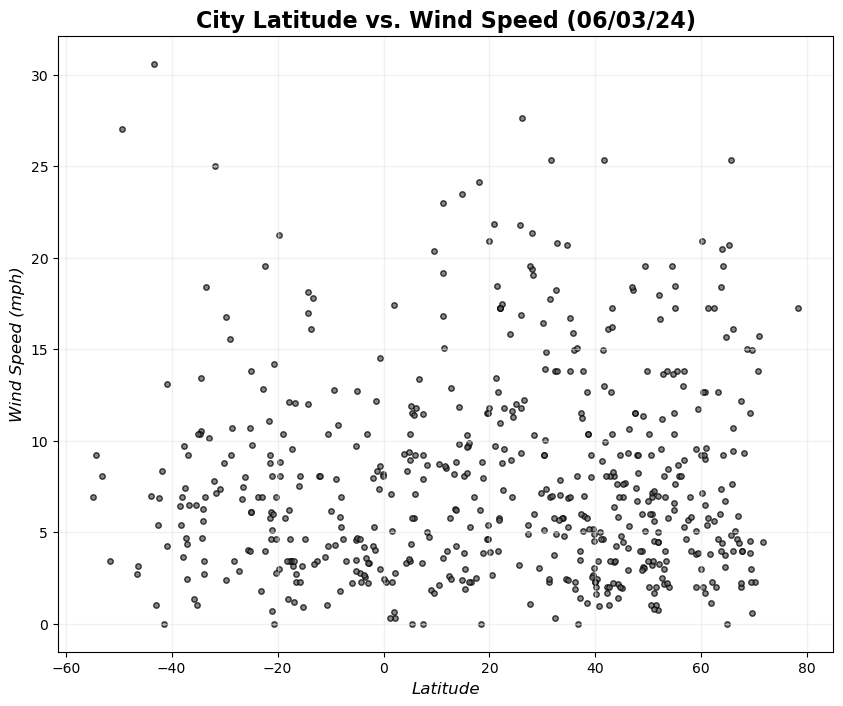

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 8))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], marker="o", s=15, alpha=0.75, color="#616163", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"), fontsize=16, fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (mph)", fontsize=12, fontstyle="italic")
plt.grid(color="#E5E5E5", linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, color):
    
    plt.figure(figsize=(10, 8))
    plt.scatter(x_values, y_values, marker="o", s=15, alpha=0.75, color=color, edgecolors="black")
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    return line_eq, r_value

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,82.38,82.0,100.0,17.27,US,1.717447e+09
1,kodiak,57.7900,-152.4072,45.91,87.0,100.0,6.91,US,1.717448e+09
2,san patricio,28.0170,-97.5169,91.35,60.0,100.0,21.34,US,1.717448e+09
4,thompson,55.7435,-97.8558,59.16,55.0,75.0,8.05,CA,1.717448e+09
6,labytnangi,66.6572,66.4183,32.38,82.0,75.0,4.63,RU,1.717448e+09


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,bredasdorp,-34.5322,20.0403,58.21,77.0,100.0,10.51,ZA,1.717448e+09
7,usoke,-5.1667,32.3500,69.96,53.0,4.0,4.56,TZ,1.717448e+09
8,ushuaia,-54.8000,-68.3000,40.66,65.0,40.0,6.91,AR,1.717448e+09
12,port-aux-francais,-49.3500,70.2167,35.37,82.0,99.0,27.04,TF,1.717448e+09
16,waitangi,-43.9535,-176.5597,47.82,75.0,85.0,7.00,NZ,1.717448e+09


###  Temperature vs. Latitude Linear Regression Plot

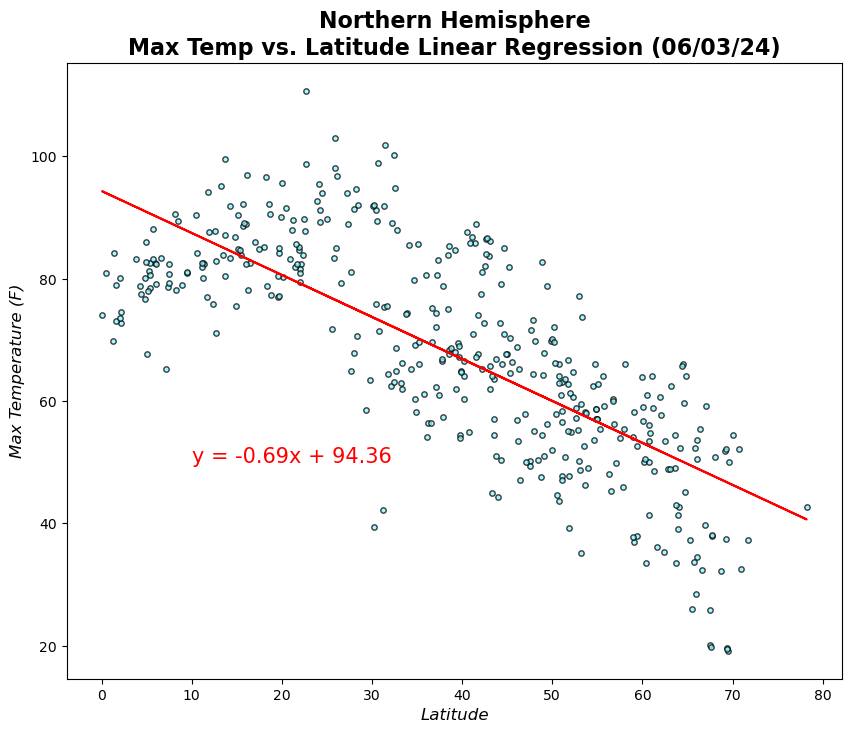

The r-value is: -0.7552042392625573


In [23]:
# Linear regression on Northern Hemisphere
line_eq, r_value = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "#87F6FF")

plt.title("Northern Hemisphere\nMax Temp vs. Latitude Linear Regression (%s)" % time.strftime("%x"),
          fontsize=16, 
          fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temperature (F)", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (10, 50), fontsize=15, color="red")

plt.show()
print(f"The r-value is: {r_value}")

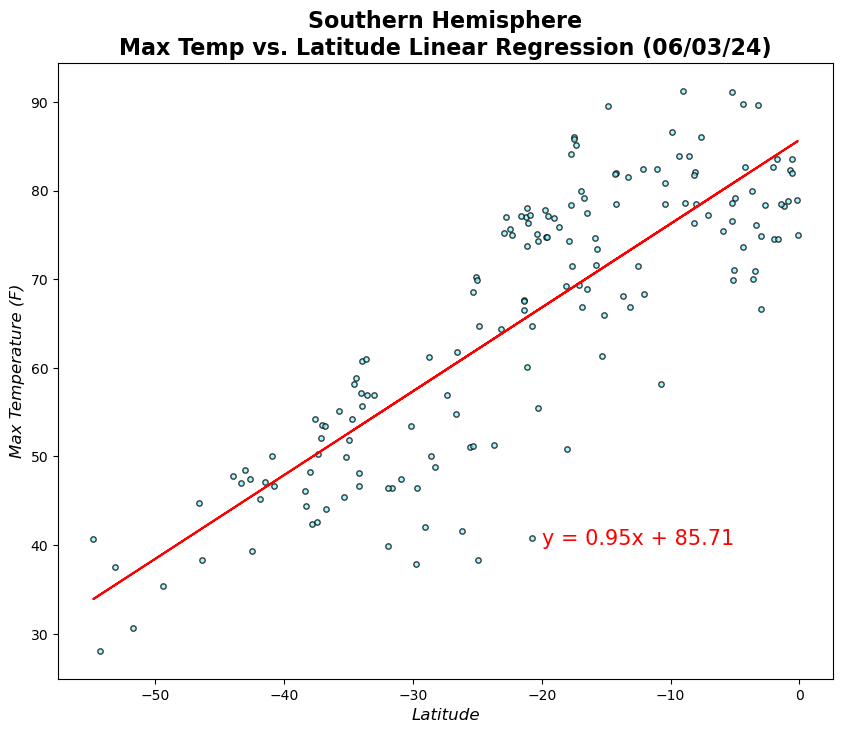

The r-value is: 0.8350033722238077


In [16]:
# Linear regression on Southern Hemisphere
line_eq, r_value = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "#87F6FF")

plt.title("Southern Hemisphere\nMax Temp vs. Latitude Linear Regression (%s)" % time.strftime("%x"),
          fontsize=16, 
          fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temperature (F)", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (-20, 40), fontsize=15, color="red")

plt.show()
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

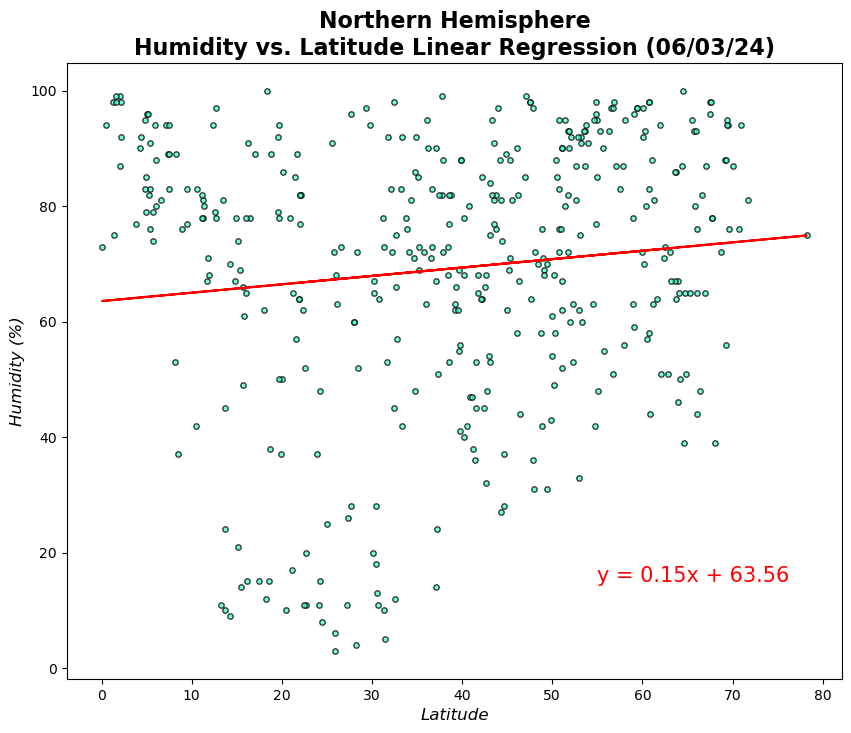

The r-value is: 0.1180900150332057


In [17]:
# Northern Hemisphere
line_eq, r_value = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "#44FFD2")

plt.title("Northern Hemisphere\nHumidity vs. Latitude Linear Regression (%s)" % time.strftime("%x"),
          fontsize=16,
          fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (55, 15), fontsize=15, color="red")

plt.show()
print(f"The r-value is: {r_value}")

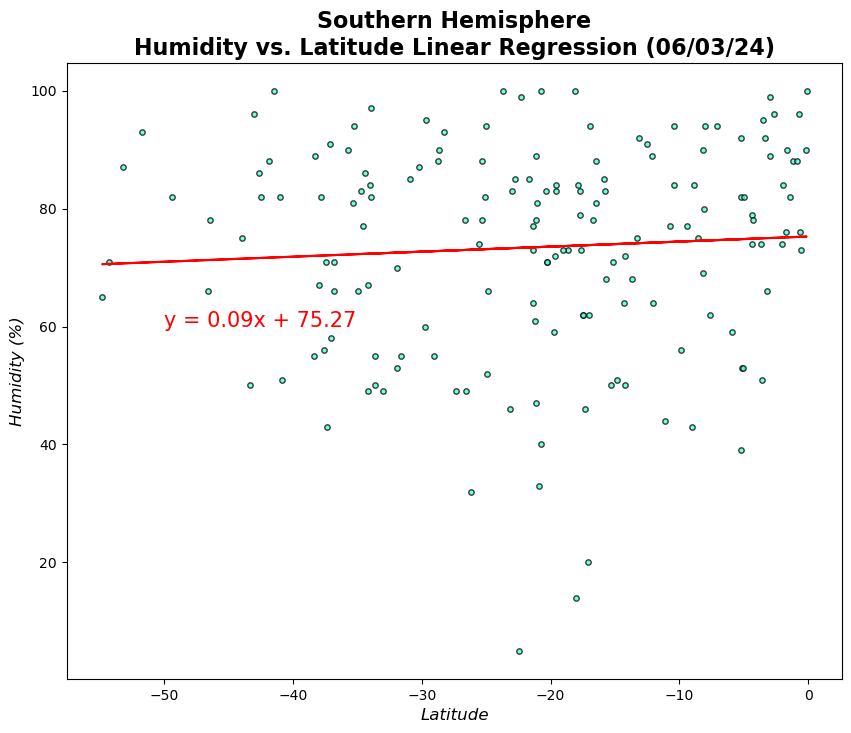

The r-value is: 0.06419281448172652


In [24]:
# Southern Hemisphere
line_eq, r_value = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "#44FFD2")

plt.title("Southern Hemisphere\nHumidity vs. Latitude Linear Regression (%s)" % time.strftime("%x"),
          fontsize=16, 
          fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (-50, 60), fontsize=15, color="red")

plt.show()
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is no correlation between latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

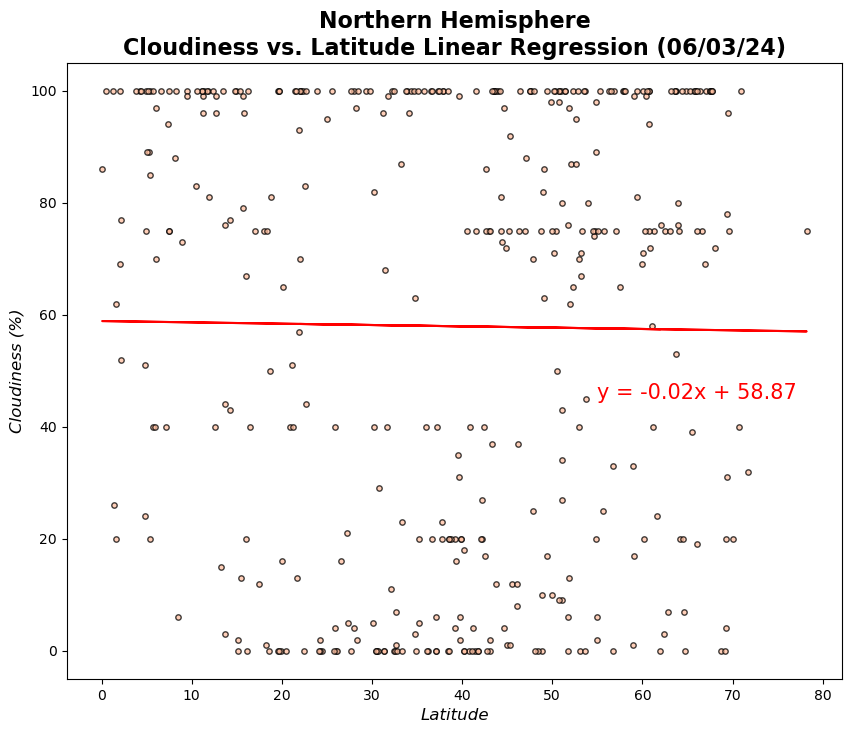

The r-value is: -0.011479298480302401


In [25]:
# Northern Hemisphere
line_eq, r_value = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "#FFBFA0")

plt.title("Northern Hemisphere\nCloudiness vs. Latitude Linear Regression (%s)" % time.strftime("%x"),
          fontsize=16,
          fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (55, 45), fontsize=15, color="red")

plt.show()
print(f"The r-value is: {r_value}")

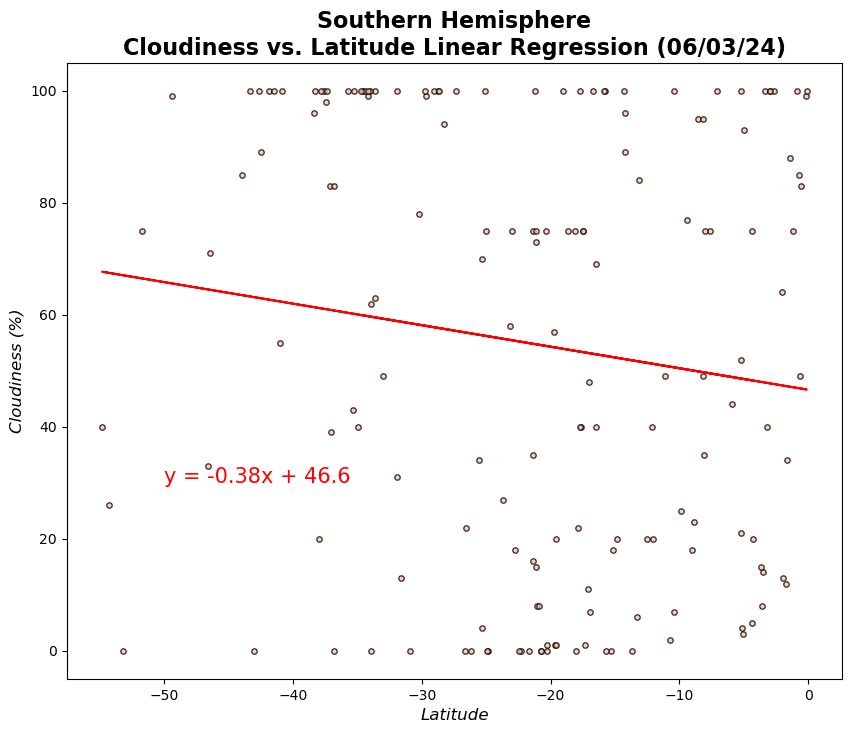

The r-value is: -0.13394933600962958


In [20]:
# Southern Hemisphere
line_eq, r_value = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "#FFBFA0")

plt.title("Southern Hemisphere\nCloudiness vs. Latitude Linear Regression (%s)" % time.strftime("%x"),
          fontsize=16, 
          fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (%)", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (-50, 30), fontsize=15, color="red")

plt.show()
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

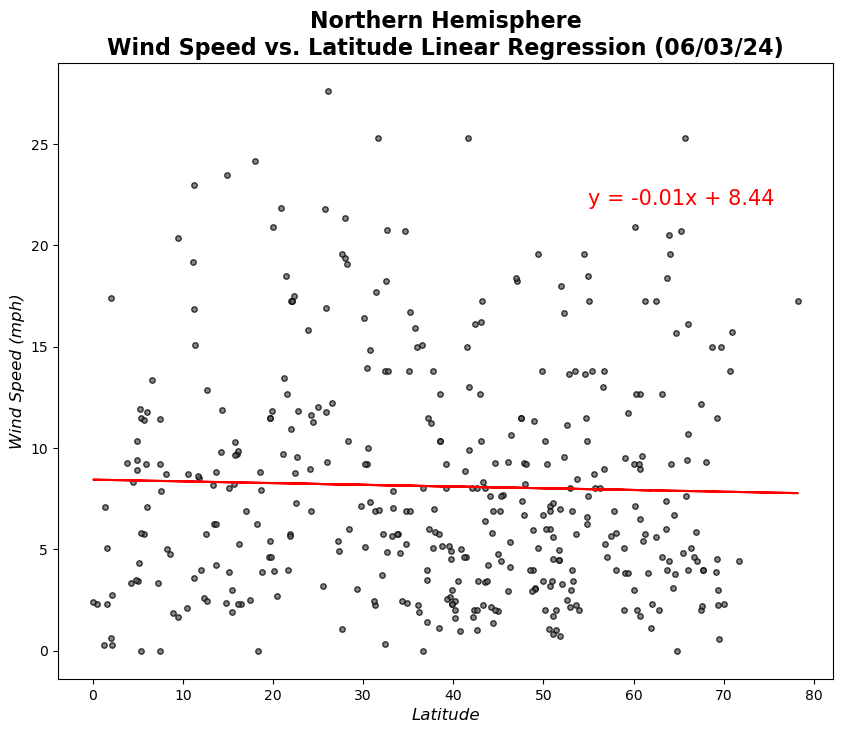

The r-value is: -0.02887252638091365


In [28]:
# Northern Hemisphere
line_eq, r_value = linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "#616163")

plt.title("Northern Hemisphere\nWind Speed vs. Latitude Linear Regression (%s)" % time.strftime("%x"),
          fontsize=16,
          fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (mph)", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (55, 22), fontsize=15, color="red")

plt.show()
print(f"The r-value is: {r_value}")

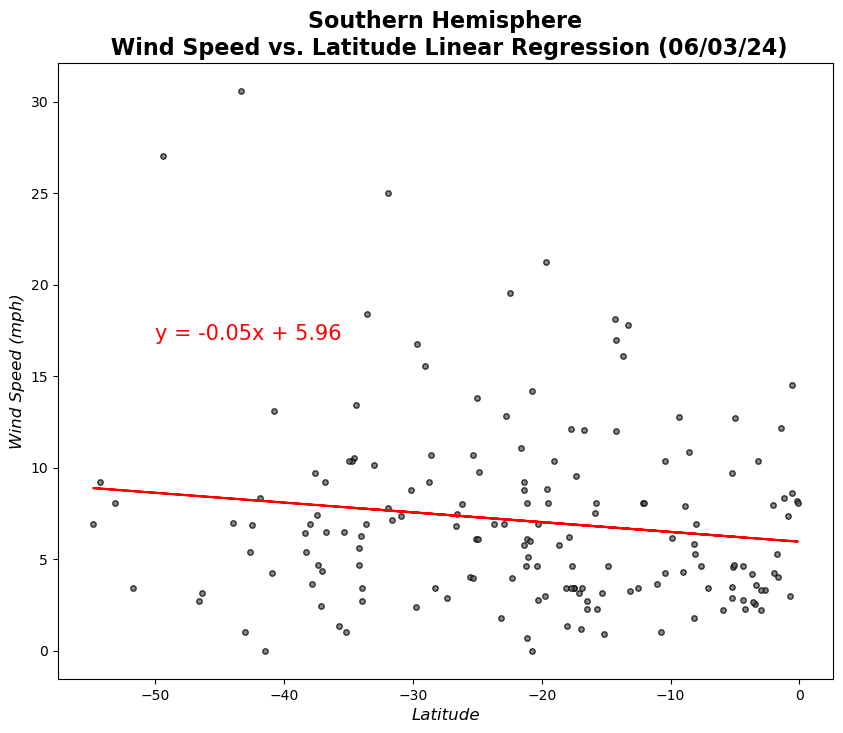

The r-value is: -0.14310688273799302


In [22]:
# Southern Hemisphere
line_eq, r_value = linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "#616163")

plt.title("Southern Hemisphere\n Wind Speed vs. Latitude Linear Regression (%s)" % time.strftime("%x"),
          fontsize=16, 
          fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (mph)", fontsize=12, fontstyle="italic")

plt.annotate(line_eq, (-50, 17), fontsize=15, color="red")

plt.show()
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed.